##Домашняя работа 1 Рекомендации на основе содержания

##Датасет MovieLens

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
# загрузим данные
!wget 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

--2025-01-28 05:41:27--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  6.08MB/s    in 0.2s    

2025-01-28 05:41:27 (6.08 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [4]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

In [5]:
# прочитаем
links = pd.read_csv('/content/unpacked_files/ml-latest-small/links.csv')
movies = pd.read_csv('/content/unpacked_files/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/unpacked_files/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/unpacked_files/ml-latest-small/tags.csv')

###Посмотрим, что мы имеем

In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# посмотрим на теги
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


###Пользователи

In [10]:
grouped_users = tags['userId'].value_counts()
grouped_users[:10]

,count
userId,
474,1507
567,432
62,370
599,323
477,280
424,273
537,100
125,48
357,45


In [11]:
# посмотрим сколько их
len(grouped_users)

58

In [12]:
# посмотрим на медиану и среднее значение
grouped_users.median(), grouped_users.mean()

(4.0, 63.5)

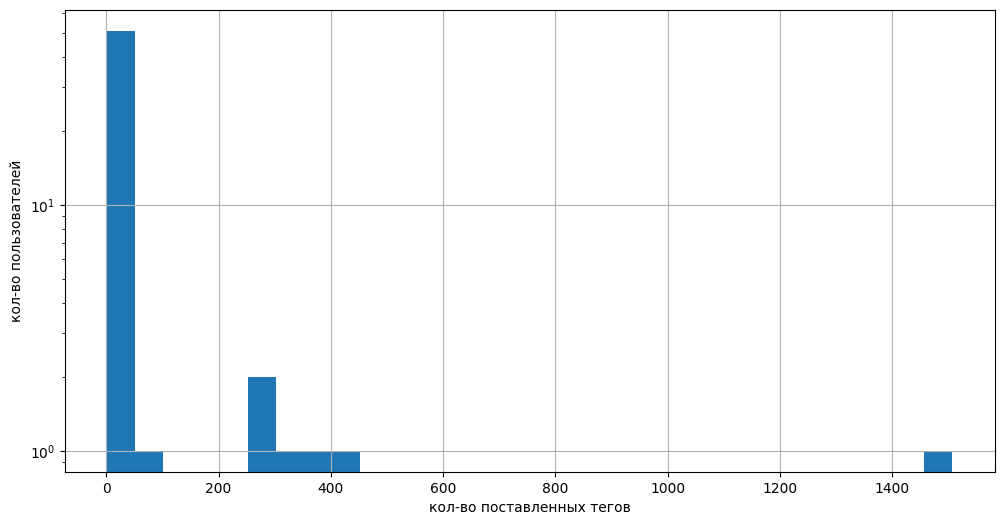

In [13]:
# посмотрим как это все выглядит в логарифмической системе координат
plt.figure(figsize=(12, 6))
grouped_users.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во пользователей');

###Фильмы

In [14]:
# посмотрим на фильмы
grouped_movies = tags['movieId'].value_counts()
# добавим для наглядности названия и жанры
pd.DataFrame(grouped_movies).join(movies.set_index('movieId'), on='movieId')

,count,title,genres
movieId,,,
296,181,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2959,54,Fight Club (1999),Action|Crime|Drama|Thriller
924,41,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
293,35,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
7361,34,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
...,...,...,...
3307,1,City Lights (1931),Comedy|Drama|Romance
3310,1,"Kid, The (1921)",Comedy|Drama
3317,1,Wonder Boys (2000),Comedy|Drama


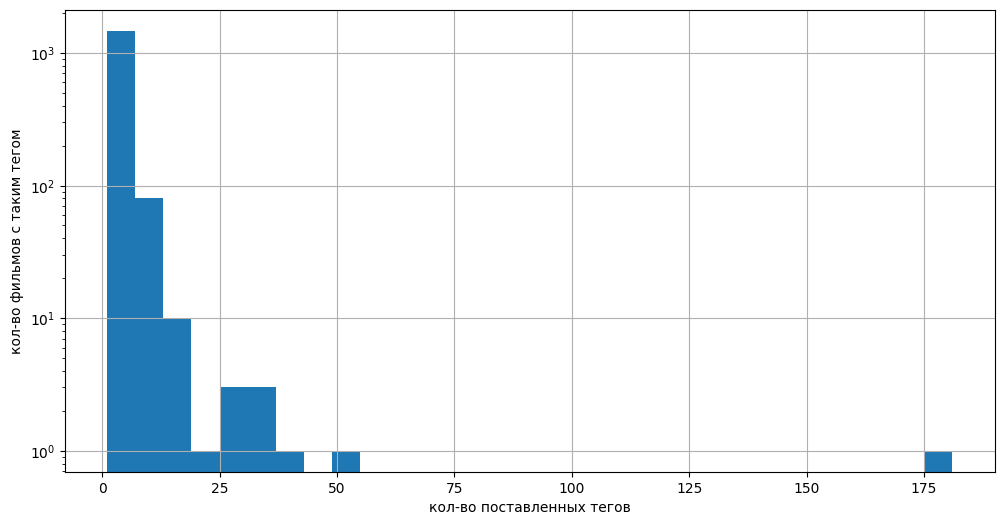

In [15]:
# посмотрим визуально в логарифмической системе координат
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во фильмов с таким тегом');

In [16]:
# найдем среднее значение и медиану
grouped_movies.mean(), grouped_movies.median()

(2.3428753180661577, 1.0)

### Дата

In [17]:
# посмотрим на дату и преобразуем ее
tags['dt'] = tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
tags.head()

,userId,movieId,tag,timestamp,dt
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [18]:
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month

In [19]:
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)
tags.head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,2015-10-24 19:29:54,2015,10,2015-10
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,2015,10,2015-10
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,2015,10,2015-10
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27,2015,10,2015-10
4,2,89774,MMA,1445715200,2015-10-24 19:33:20,2015,10,2015-10


In [20]:
grouped_date = tags['year_month'].value_counts()[:30]
grouped_date[:30]

,count
year_month,
2006-1,1462
2018-5,670
2017-6,323
2016-3,280
2015-2,109
2018-6,101
2009-5,87
2010-1,62
2009-6,52


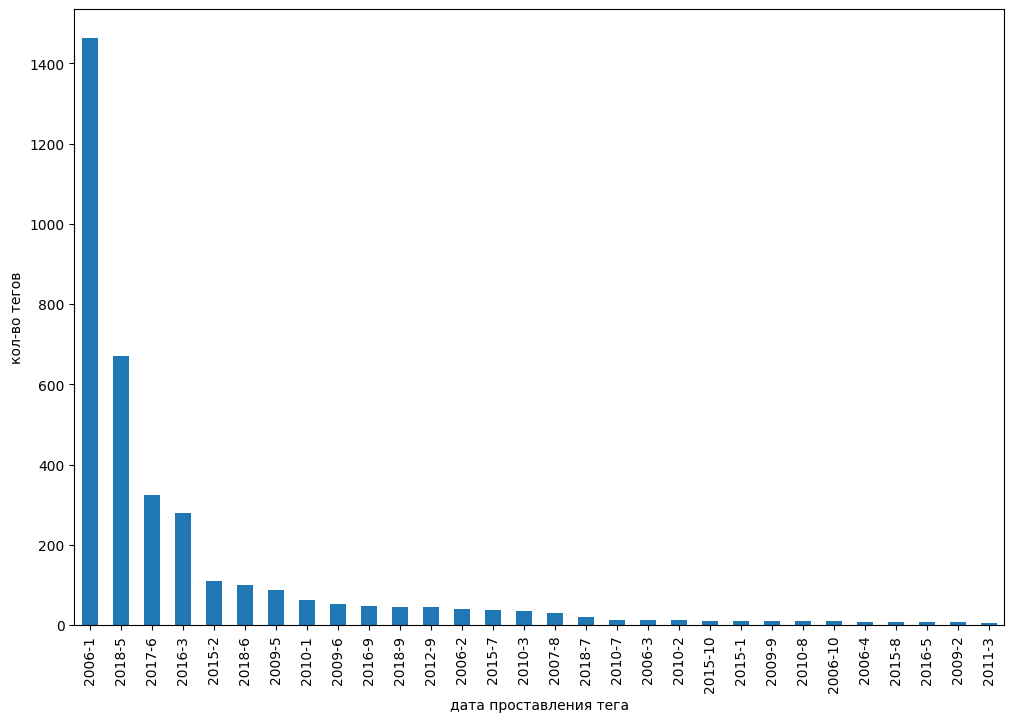

In [21]:
plt.figure(figsize=(12, 8))
grouped_date.plot.bar()
plt.xlabel('дата проставления тега')
plt.ylabel('кол-во тегов');

### Жанры

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
# рассчитаем количество жанров на каждом фильме
movies['num_generes'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [24]:
# отсортируем
movies.sort_values('num_generes', ascending=False).head()

,movieId,title,genres,num_generes
7441,81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10
5556,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,8
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,7
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,7
5819,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...,7


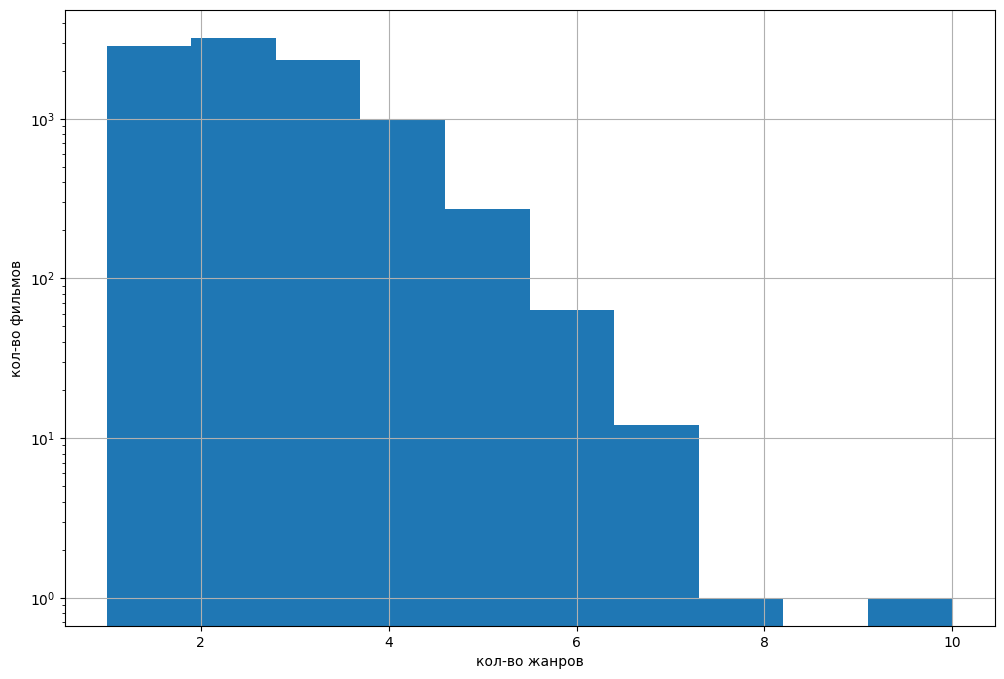

In [25]:
# посмотрим визуально в логарифмической системе координат
plt.figure(figsize=(12, 8))
movies['num_generes'].hist(bins=10, log=True)
plt.xlabel('кол-во жанров')
plt.ylabel('кол-во фильмов');

In [26]:
# рассчитаем среднее значение и медиану
np.mean(movies['num_generes']), np.median(movies['num_generes'])

(2.2668856497639087, 2.0)

##Построение рекомендаций на основании средних оценок пользователя фильмов

In [27]:
# загрузим библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import layers as L
from keras import initializers

In [28]:
# соберем датасет из user id, movie title, rating
merged_dataset = pd.merge(ratings, movies, how='inner', on='movieId')
dataset = merged_dataset[['userId', 'title', 'rating']]
df = dataset.copy()
dataset.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


Проверим и закодируем наши данные



In [29]:
# позьзователи
user_enc = LabelEncoder()
dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
n_users = dataset['user'].nunique()

# фильмы
item_enc = LabelEncoder()
dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
n_movies = dataset['movie'].nunique()

# рейтинги
item_rat = LabelEncoder()
dataset['rating'] = item_rat.fit_transform(dataset['rating'].values)
min_rating = min(dataset['rating'])
max_rating = max(dataset['rating'])

# смотрим, что получилось
n_users, n_movies, min_rating, max_rating

<ipython-input-29-df1fe697f55c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
<ipython-input-29-df1fe697f55c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
<ipython-input-29-df1fe697f55c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

(610, 9719, 0, 9)

In [30]:
# в итоге имеем
dataset.head()

,userId,title,rating,user,movie
0,1,Toy Story (1995),7,0,8871
1,1,Grumpier Old Men (1995),7,0,3661
2,1,Heat (1995),7,0,3845
3,1,Seven (a.k.a. Se7en) (1995),9,0,7523
4,1,"Usual Suspects, The (1995)",9,0,9119


In [31]:
# разобъем данные на обучающую и тестовуб выборку
X = dataset[['user', 'movie']].values
y = dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# нормализовывать данные не стоит
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_train

In [33]:
# разделим на 2 отдельных слоя
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]
X_train, X_train_array, X_train_array[0].shape

(array([[ 508, 7476],
        [ 325, 1999],
        [  56, 4345],
        ...,
        [ 479, 8025],
        [   5, 2142],
        [ 102, 5230]]),
 [array([508, 325,  56, ..., 479,   5, 102]),
  array([7476, 1999, 4345, ..., 8025, 2142, 5230])],
 (80668,))

In [34]:
X_train[0]

array([ 508, 7476])

In [35]:
X_train_array[0]

array([508, 325,  56, ..., 479,   5, 102])

Построим нашу умную (и уже немного знакомую) сеть

In [36]:
# уменьшаем скорость обучения
from keras import callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_sparse_categorical_accuracy',
                                        factor=0.75,
                                        patience=2,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.00001,
                                        cooldown=2,
                                        min_lr=1e-5
                                       )

In [40]:
# построим нашу модель
try:
  K.clear_session()
  del model
except:
  pass

# зададим размер векторного пространства
n_factors = 256

# наш входной слой пользователей
user = L.Input(shape=(1,))
# уровень встраивания для n_factors пользователей
u = L.Embedding(n_users, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = L.Reshape((n_factors,))(u)

# наш входной слой для фильмов
movie = L.Input(shape=(1,))
# слой встраивания для n_factors фильмов
m = L.Embedding(n_movies, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = L.Reshape((n_factors,))(m)

# объединим пользователей и фильмы
merged = L.Concatenate()([u, m])

# добавим полносвязные слои
out = L.Dense(512, activation='relu')(merged)
out = L.BatchNormalization()(out)
out = L.Dense(256, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(128, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(64, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(32, activation='relu')(out)
out = L.Dense(10, activation='softmax')(out)

# соберем модель
model = keras.Model(inputs=[user, movie], outputs=out, name='My_model')


In [41]:
# посмотрим на модель
model.summary()

Model: "My_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 256)         │        156,160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 256)         │      2,488,064 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 256)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 256)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        262,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512)            │          2,048 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64)             │            256 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)      

 Total params: 3,085,610 (11.77 MB)

 Trainable params: 3,083,690 (11.76 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [42]:
# зададим параметры
loss = keras.losses.SparseCategoricalCrossentropy()
metrics=['sparse_categorical_accuracy']   # для целочисленных меток
epochs = 10
batch_size = 32
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# скомпилируем модель
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# обучим модель
model.fit(X_train_array, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #callbacks=None,
          callbacks=[reduce_lr],
          validation_data=(X_test_array, y_test)
)

Epoch 1/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 126s 48ms/step - loss: 1.9072 - sparse_categorical_accuracy: 0.2770 - val_loss: 1.6945 - val_sparse_categorical_accuracy: 0.3307 - learning_rate: 0.0010
Epoch 2/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 144s 49ms/step - loss: 1.6368 - sparse_categorical_accuracy: 0.3536 - val_loss: 1.6681 - val_sparse_categorical_accuracy: 0.3418 - learning_rate: 0.0010
Epoch 3/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 116s 46ms/step - loss: 1.5485 - sparse_categorical_accuracy: 0.3926 - val_loss: 1.6701 - val_sparse_categorical_accuracy: 0.3424 - learning_rate: 0.0010
Epoch 4/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 139s 45ms/step - loss: 1.4667 - sparse_categorical_accuracy: 0.4313 - val_loss: 1.7239 - val_sparse_categorical_accuracy: 0.3372 - learning_rate: 0.0010
Epoch 5/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.3728 - sparse_categorical_accuracy: 0.4708
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 141s 

In [43]:
# проверим
from sklearn.metrics import accuracy_score

predict_x = model.predict(X_test_array)
classes_x = np.argmax(predict_x, axis=1)

test_acc = accuracy_score(y_test, classes_x)
print('\nTest_acc =', test_acc)
if test_acc > 0.8:
    print('Это победа!')
else:
    print('пичалька)')

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Test_acc = 0.31763189210630705
пичалька)


##Воспользуемся информацией о жанрах

In [44]:
# загрузим библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import layers as L
from keras import initializers

In [45]:
merged_dataset = pd.merge(ratings, movies, how='inner', on='movieId')
dataset = merged_dataset[['userId', 'title', 'rating']]
df = dataset.copy()
dataset.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


In [46]:
dataset = merged_dataset[['userId', 'title', 'rating', 'genres', 'num_generes']]
dataset.head()

,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,5
1,1,Grumpier Old Men (1995),4.0,Comedy|Romance,2
2,1,Heat (1995),4.0,Action|Crime|Thriller,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery|Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime|Mystery|Thriller,3


In [47]:
# преобразуем genres

# спасибо за красивый код в лекциях!
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

movie_genres = [change_string(g) for g in movies.genres.values]
movie_genres[:10]

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller']

In [48]:
# запишем жанры покрасивее
dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))
dataset.head(10)

<ipython-input-48-d93862997d31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))


,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure Animation Children Comedy Fantasy,5
1,1,Grumpier Old Men (1995),4.0,Comedy Romance,2
2,1,Heat (1995),4.0,Action Crime Thriller,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime Mystery Thriller,3
5,1,From Dusk Till Dawn (1996),3.0,Action Comedy Horror Thriller,4
6,1,Bottle Rocket (1996),5.0,Adventure Comedy Crime Romance,4
7,1,Braveheart (1995),4.0,Action Drama War,3
8,1,Rob Roy (1995),5.0,Action Drama Romance War,4
9,1,Canadian Bacon (1995),5.0,Comedy War,2


TF-IDF анализ

Проведя TF-IDF анализ собственным экспертным методом принимаю решение оставить только первые два жанра. Потому что;

1. Далее жанры банально повторяются и теряют уникальность
2. Да и в рекламе фильиов я ни разу не видел ссылку на много жанров. Как например "Лучший Adventure Animation Children Comedy Fantasy" фильм)
3. А значит эти жанры уже мало информативны для пользователей



In [49]:
# оставлю в жанрах только первые два
dataset['genres'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:2]))
dataset.head(10)

<ipython-input-49-87f294ee8c0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:2]))


,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure Animation,5
1,1,Grumpier Old Men (1995),4.0,Comedy Romance,2
2,1,Heat (1995),4.0,Action Crime,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime Mystery,3
5,1,From Dusk Till Dawn (1996),3.0,Action Comedy,4
6,1,Bottle Rocket (1996),5.0,Adventure Comedy,4
7,1,Braveheart (1995),4.0,Action Drama,3
8,1,Rob Roy (1995),5.0,Action Drama,4
9,1,Canadian Bacon (1995),5.0,Comedy War,2


Проверим и закодируем наши данные

In [50]:
# пользователи
user_enc = LabelEncoder()
dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
n_users = dataset['user'].nunique()

# фильмы
item_enc = LabelEncoder()
dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
n_movies = dataset['movie'].nunique()

# жанры
item_gen = LabelEncoder()
dataset['genres'] = item_gen.fit_transform(dataset['genres'].values)
n_genres = dataset['genres'].nunique()

# рейтинги
item_rat = LabelEncoder()
dataset['rating'] = item_rat.fit_transform(dataset['rating'].values)
min_rating = min(dataset['rating'])
max_rating = max(dataset['rating'])

# смотрим, что получилось
n_users, n_movies, n_genres, min_rating, max_rating

<ipython-input-50-c1721a6f590e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['user'] = user_enc.fit_transform(dataset['userId'].values)


(610, 9719, 136, 0, 9)

In [51]:
dataset.head()

,userId,title,rating,genres,num_generes,user,movie
0,1,Toy Story (1995),7,19,5,0,8871
1,1,Grumpier Old Men (1995),7,63,2,0,3661
2,1,Heat (1995),7,6,3,0,3845
3,1,Seven (a.k.a. Se7en) (1995),9,124,2,0,7523
4,1,"Usual Suspects, The (1995)",9,75,3,0,9119


In [52]:
# разобъем данные на обучающую и тестовуб выборку
X = dataset[['user', 'movie', 'genres']].values
y = dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[ 508, 7476,  124],
        [ 325, 1999,   80],
        [  56, 4345,    2],
        ...,
        [ 479, 8025,   58],
        [   5, 2142,   88],
        [ 102, 5230,   58]]),
 array([[ 431, 7183,    2],
        [ 287, 4309,   15],
        [ 598, 6691,    6],
        ...,
        [ 225, 1624,   70],
        [ 606,  334,   10],
        [ 566, 2531,   66]]),
 array([5, 7, 5, ..., 7, 5, 9]),
 array([8, 5, 5, ..., 8, 5, 5]))

In [53]:
# разделим на 3 отдельных слоя
X_train_array = [X_train[:, 0], X_train[:, 1], X_train[:, 2]]
X_test_array = [X_test[:, 0], X_test[:, 1], X_test[:, 2]]
X_train, X_train_array, X_train_array[0].shape

(array([[ 508, 7476,  124],
        [ 325, 1999,   80],
        [  56, 4345,    2],
        ...,
        [ 479, 8025,   58],
        [   5, 2142,   88],
        [ 102, 5230,   58]]),
 [array([508, 325,  56, ..., 479,   5, 102]),
  array([7476, 1999, 4345, ..., 8025, 2142, 5230]),
  array([124,  80,   2, ...,  58,  88,  58])],
 (80668,))

In [54]:
# построим нашу модель
try:
  K.clear_session()
  del model
except:
  pass

# размерность векторного пространства приму равной числу оставшихся жанров
n_factors = n_genres

# наш входной слой пользователей
user = L.Input(shape=(1,))
# уровень встраивания для n_factors пользователей
u = L.Embedding(n_users, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = L.Reshape((n_factors,))(u)

# наш входной слой для фильмов
movie = L.Input(shape=(1,))
# слой встраивания для n_factors фильмов
m = L.Embedding(n_movies, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = L.Reshape((n_factors,))(m)

# наш входной слой жанров
genres = L.Input(shape=(1,))
# уровень встраивания для n_factors жанров
g = L.Embedding(n_genres, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(genres)
g = L.Reshape((n_factors,))(g)

# объединим пользователей,фильмы и жанры
merged = L.Concatenate()([u, m, g])

# добавим полносвязные слои
out = L.Dense(256, activation='relu')(merged)
out = L.BatchNormalization()(out)
out = L.Dropout(0.2)(out)
out = L.Dense(256, activation='relu')(out)
out = L.BatchNormalization()(out)
#out = L.Dropout(0.2)(out)
out = L.Dense(128, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(64, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(32, activation='relu')(out)
out = L.Dense(10, activation='softmax')(out)

# соберем модель
model = keras.Model(inputs=[user, movie, genres], outputs=out, name='My_model_u_m_g')

In [55]:
# посмотрим на модель
model.summary()

Model: "My_model_u_m_g"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 136)         │         82,960 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 136)         │      1,321,784 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 136)         │         18,496 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 136)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 136)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 136)            │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 408)            │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0],       │
│                           │                        │                │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        104,704 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256)            │          1,024 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2

 Total params: 1,640,114 (6.26 MB)

 Trainable params: 1,638,706 (6.25 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [56]:
# зададим параметры
loss = keras.losses.SparseCategoricalCrossentropy()
metrics=['sparse_categorical_accuracy']   # для целочисленных меток
epochs = 10
batch_size = 32
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# скомпилируем модель
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# обучим модель
model.fit(X_train_array, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #callbacks=None,
          callbacks=[reduce_lr],
          validation_data=(X_test_array, y_test)
)

Epoch 1/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - loss: 1.9365 - sparse_categorical_accuracy: 0.2694 - val_loss: 1.6921 - val_sparse_categorical_accuracy: 0.3289 - learning_rate: 0.0010
Epoch 2/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - loss: 1.6353 - sparse_categorical_accuracy: 0.3528 - val_loss: 1.6681 - val_sparse_categorical_accuracy: 0.3372 - learning_rate: 0.0010
Epoch 3/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 1.5623 - sparse_categorical_accuracy: 0.3822 - val_loss: 1.6643 - val_sparse_categorical_accuracy: 0.3398 - learning_rate: 0.0010
Epoch 4/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - loss: 1.4947 - sparse_categorical_accuracy: 0.4159 - val_loss: 1.6796 - val_sparse_categorical_accuracy: 0.3418 - learning_rate: 0.0010
Epoch 5/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - loss: 1.4248 - sparse_categorical_accuracy: 0.4473 - val_loss: 1.7230 - val_sparse_categorical_accuracy: 0.3355 - learning_rate: 0.0010
Epoch 6/10
2521/2521 ━━━━━━━━━

In [57]:
# проверим
from sklearn.metrics import accuracy_score

predict_x = model.predict(X_test_array)
classes_x = np.argmax(predict_x, axis=1)

test_acc = accuracy_score(y_test, classes_x)
print('\nTest_acc =', test_acc)
if test_acc > 0.8:
    print('Это победа!')
else:
    print('пичалька)')

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Test_acc = 0.32794525981753275
пичалька)


##Раccмотрим три первых жанра

In [58]:
# соберем датасет из user id, movie title, rating, genres
merged_dataset = pd.merge(ratings, movies, how='inner', on='movieId')
dataset = merged_dataset[['userId', 'title', 'rating', 'movieId', 'genres']]
dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))
# оставлю в жанрах только первые три
dataset['genres'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:3]))
dataset.head(10)

<ipython-input-58-daca8756146d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))
<ipython-input-58-daca8756146d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:3]))


,userId,title,rating,movieId,genres
0,1,Toy Story (1995),4.0,1,Adventure Animation Children
1,1,Grumpier Old Men (1995),4.0,3,Comedy Romance
2,1,Heat (1995),4.0,6,Action Crime Thriller
3,1,Seven (a.k.a. Se7en) (1995),5.0,47,Mystery Thriller
4,1,"Usual Suspects, The (1995)",5.0,50,Crime Mystery Thriller
5,1,From Dusk Till Dawn (1996),3.0,70,Action Comedy Horror
6,1,Bottle Rocket (1996),5.0,101,Adventure Comedy Crime
7,1,Braveheart (1995),4.0,110,Action Drama War
8,1,Rob Roy (1995),5.0,151,Action Drama Romance
9,1,Canadian Bacon (1995),5.0,157,Comedy War


In [59]:
# запишем жанры
dataset['genres_1'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:1]))
dataset['genres_2'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[1:2]))
dataset['genres_3'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[2:3]))
dataset.head(10)

<ipython-input-59-516200ebaca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres_1'] = dataset['genres'].apply(lambda x: ' '.join(x.split()[:1]))


,userId,title,rating,movieId,genres,genres_1,genres_2,genres_3
0,1,Toy Story (1995),4.0,1,Adventure Animation Children,Adventure,Animation,Children
1,1,Grumpier Old Men (1995),4.0,3,Comedy Romance,Comedy,Romance,
2,1,Heat (1995),4.0,6,Action Crime Thriller,Action,Crime,Thriller
3,1,Seven (a.k.a. Se7en) (1995),5.0,47,Mystery Thriller,Mystery,Thriller,
4,1,"Usual Suspects, The (1995)",5.0,50,Crime Mystery Thriller,Crime,Mystery,Thriller
5,1,From Dusk Till Dawn (1996),3.0,70,Action Comedy Horror,Action,Comedy,Horror
6,1,Bottle Rocket (1996),5.0,101,Adventure Comedy Crime,Adventure,Comedy,Crime
7,1,Braveheart (1995),4.0,110,Action Drama War,Action,Drama,War
8,1,Rob Roy (1995),5.0,151,Action Drama Romance,Action,Drama,Romance
9,1,Canadian Bacon (1995),5.0,157,Comedy War,Comedy,War,


In [60]:
# посмотрим, что у нас в пустых ячейках
dataset['genres_3'][1]

''

In [61]:
# заменим все эти яейки на no_genres
dataset.loc[dataset['genres_1'] == '', 'genres_1'] = 'no_genres'
dataset.loc[dataset['genres_2'] == '', 'genres_2'] = 'no_genres'
dataset.loc[dataset['genres_3'] == '', 'genres_3'] = 'no_genres'
dataset.head()

,userId,title,rating,movieId,genres,genres_1,genres_2,genres_3
0,1,Toy Story (1995),4.0,1,Adventure Animation Children,Adventure,Animation,Children
1,1,Grumpier Old Men (1995),4.0,3,Comedy Romance,Comedy,Romance,no_genres
2,1,Heat (1995),4.0,6,Action Crime Thriller,Action,Crime,Thriller
3,1,Seven (a.k.a. Se7en) (1995),5.0,47,Mystery Thriller,Mystery,Thriller,no_genres
4,1,"Usual Suspects, The (1995)",5.0,50,Crime Mystery Thriller,Crime,Mystery,Thriller


In [62]:
# посмотрим на уникальные жанры в 3-й коронке жанров
dataset['genres_3'].unique(), dataset['genres_3'].nunique()

(array(['Children', 'no_genres', 'Thriller', 'Horror', 'Crime', 'War',
        'Romance', 'Western', 'SciFi', 'Drama', 'Comedy', 'Fantasy',
        'Mystery', 'Musical', 'FilmNoir', 'IMAX', 'Animation',
        'Documentary'], dtype=object),
 18)

In [63]:
# соберем все названия жанров
from collections import Counter

tokens = []
for title in dataset['genres_1']:
    tokens += title.split()
for title in dataset['genres_2']:
    tokens += title.split()
for title in dataset['genres_3']:
    tokens += title.split()

In [64]:
# найдем уникальные
genres_unique = set(tokens)
# преобразуем в массив
list(genres_unique)

['(nogenreslisted)',
 'Adventure',
 'Horror',
 'FilmNoir',
 'Western',
 'IMAX',
 'Action',
 'War',
 'Children',
 'Drama',
 'Mystery',
 'Comedy',
 'Animation',
 'Fantasy',
 'Thriller',
 'SciFi',
 'Musical',
 'Documentary',
 'Crime',
 'no_genres',
 'Romance']

In [65]:
# найдем все '(nogenreslisted)'
dataset.loc[dataset['genres_1'] == '(nogenreslisted)']

,userId,title,rating,movieId,genres,genres_1,genres_2,genres_3
3624,21,Pirates of the Caribbean: Dead Men Tell No Tal...,4.0,122896,(nogenreslisted),(nogenreslisted),no_genres,no_genres
7353,50,La cravate (1957),3.0,114335,(nogenreslisted),(nogenreslisted),no_genres,no_genres
7408,50,The Putin Interviews (2017),2.5,174403,(nogenreslisted),(nogenreslisted),no_genres,no_genres
9101,62,Pirates of the Caribbean: Dead Men Tell No Tal...,3.5,122896,(nogenreslisted),(nogenreslisted),no_genres,no_genres
9141,62,The Godfather Trilogy: 1972-1990 (1992),5.0,172591,(nogenreslisted),(nogenreslisted),no_genres,no_genres
9147,62,Black Mirror,5.0,176601,(nogenreslisted),(nogenreslisted),no_genres,no_genres
14028,89,Noin 7 veljestä (1968),3.0,155589,(nogenreslisted),(nogenreslisted),no_genres,no_genres
16886,105,The Adventures of Sherlock Holmes and Doctor W...,5.0,147250,(nogenreslisted),(nogenreslisted),no_genres,no_genres
16913,105,Death Note: Desu nôto (2006–2007),5.0,171749,(nogenreslisted),(nogenreslisted),no_genres,no_genres
16925,105,The Adventures of Sherlock Holmes and Doctor W...,4.5,173535,(nogenreslisted),(nogenreslisted),no_genres,no_genres


In [66]:
# заменим эти не понятные ячейки на no_genres
dataset.loc[dataset['genres_1'] == '(nogenreslisted)', 'genres_1'] = 'no_genres'
# проверим
dataset.loc[dataset['genres_1'] == '(nogenreslisted)']

,userId,title,rating,movieId,genres,genres_1,genres_2,genres_3


In [67]:
# для проверки снова соберем все названия жанров
tokens = []
for title in dataset['genres_1']:
    tokens += title.split()
for title in dataset['genres_2']:
    tokens += title.split()
for title in dataset['genres_3']:
    tokens += title.split()

# найдем уникальные
genres_unique = set(tokens)
# преобразуем в массив
list(genres_unique)

['Adventure',
 'Horror',
 'FilmNoir',
 'Western',
 'IMAX',
 'Action',
 'War',
 'Children',
 'Drama',
 'Mystery',
 'Comedy',
 'Animation',
 'Fantasy',
 'Thriller',
 'SciFi',
 'Musical',
 'Documentary',
 'Crime',
 'no_genres',
 'Romance']

Закодируем

In [68]:
# пользователи
user_enc = LabelEncoder()
dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
n_users = dataset['user'].nunique()

# фильмы
item_enc = LabelEncoder()
dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
n_movies = dataset['movie'].nunique()

# жанры
item_gen = LabelEncoder()
#item_gen.fit(list(genres_unique))
#dataset['genres_1'] = item_gen.transform(dataset['genres_1'])
#dataset['genres_2'] = item_gen.transform(dataset['genres_2'])
#dataset['genres_3'] = item_gen.transform(dataset['genres_3'])
dataset['genres_1'] = item_enc.fit_transform(dataset['genres_1'].values)
dataset['genres_2'] = item_enc.fit_transform(dataset['genres_2'].values)
dataset['genres_3'] = item_enc.fit_transform(dataset['genres_3'].values)
n_genres_1 = dataset['genres_1'].nunique()
n_genres_2 = dataset['genres_2'].nunique()
n_genres_3 = dataset['genres_3'].nunique()

# рейтинги
item_rat = LabelEncoder()
dataset['rating'] = item_rat.fit_transform(dataset['rating'].values)
min_rating = min(dataset['rating'])
max_rating = max(dataset['rating'])

In [69]:
# смотрим, что получилось
n_users, n_movies, n_genres_1, n_genres_2, n_genres_3, min_rating, max_rating

(610, 9719, 19, 19, 18, 0, 9)

In [70]:
dataset

,userId,title,rating,movieId,genres,genres_1,genres_2,genres_3,user,movie
0,1,Toy Story (1995),7,1,Adventure Animation Children,1,1,1,0,8871
1,1,Grumpier Old Men (1995),7,3,Comedy Romance,4,13,17,0,3661
2,1,Heat (1995),7,6,Action Crime Thriller,0,4,14,0,3845
3,1,Seven (a.k.a. Se7en) (1995),9,47,Mystery Thriller,12,15,17,0,7523
4,1,"Usual Suspects, The (1995)",9,50,Crime Mystery Thriller,5,12,14,0,9119
...,...,...,...,...,...,...,...,...,...,...
100831,610,Split (2017),7,166534,Drama Horror Thriller,7,9,14,609,7938
100832,610,John Wick: Chapter Two (2017),9,168248,Action Crime Thriller,0,4,14,609,4597
100833,610,Get Out (2017),9,168250,Horror,10,18,17,609,3392
100834,610,Logan (2017),9,168252,Action SciFi,0,14,17,609,5161


In [71]:
# разобъем данные на обучающую и тестовую выборку
X = dataset[['user', 'movie', 'genres_1', 'genres_2', 'genres_3']].values
y = dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[ 508, 7476,   12,   15,   17],
        [ 325, 1999,    6,   18,   17],
        [  56, 4345,    0,    0,    6],
        ...,
        [ 479, 8025,    4,    6,   17],
        [   5, 2142,    7,   18,   17],
        [ 102, 5230,    4,    6,   12]]),
 array([[ 431, 7183,    0,    0,    5],
        [ 287, 4309,    0,   15,   17],
        [ 598, 6691,    0,    4,   14],
        ...,
        [ 225, 1624,    5,    6,   17],
        [ 606,  334,    0,    9,   13],
        [ 566, 2531,    4,   16,   17]]),
 array([5, 7, 5, ..., 7, 5, 9]),
 array([8, 5, 5, ..., 8, 5, 5]))

In [72]:
# попробуем нормализовать
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_train

In [73]:
# так совсем плохо
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_train

In [74]:
# разделим на слои
X_train_array = [X_train[:, 0], X_train[:, 1], X_train[:, 2], X_train[:, 3], X_train[:, 4]]
X_test_array = [X_test[:, 0], X_test[:, 1], X_test[:, 2], X_test[:, 3], X_test[:, 4]]
X_train, X_train_array, X_train_array[0].shape

(array([[ 508, 7476,   12,   15,   17],
        [ 325, 1999,    6,   18,   17],
        [  56, 4345,    0,    0,    6],
        ...,
        [ 479, 8025,    4,    6,   17],
        [   5, 2142,    7,   18,   17],
        [ 102, 5230,    4,    6,   12]]),
 [array([508, 325,  56, ..., 479,   5, 102]),
  array([7476, 1999, 4345, ..., 8025, 2142, 5230]),
  array([12,  6,  0, ...,  4,  7,  4]),
  array([15, 18,  0, ...,  6, 18,  6]),
  array([17, 17,  6, ..., 17, 17, 12])],
 (80668,))

In [75]:
# построим нашу модель
try:
  K.clear_session()
  del model
except:
  pass

# зададим размерность векторного пространства
n_factors = 256

# наш входной слой пользователей
user = L.Input(shape=(1,))
# уровень встраивания для n_factors пользователей
u = L.Embedding(n_users, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = L.Reshape((n_factors,))(u)

# наш входной слой для фильмов
movie = L.Input(shape=(1,))
# слой встраивания для n_factors фильмов
m = L.Embedding(n_movies, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = L.Reshape((n_factors,))(m)

# наш входной слой для жанра 1
genres_1 = L.Input(shape=(1,))
# уровень встраивания для n_factors жанров
g_1 = L.Embedding(n_genres_1, n_factors,
                  embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                  embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(genres_1)
g_1 = L.Reshape((n_factors,))(g_1)

# наш входной слой для жанра 2
genres_2 = L.Input(shape=(1,))
# уровень встраивания для n_factors жанров
g_2 = L.Embedding(n_genres_2, n_factors,
                  embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                  embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(genres_2)
g_2 = L.Reshape((n_factors,))(g_2)

# наш входной слой для жанра 3
genres_3 = L.Input(shape=(1,))
# уровень встраивания для n_factors жанров
g_3 = L.Embedding(n_genres_3, n_factors,
                  embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                  embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(genres_3)
g_3 = L.Reshape((n_factors,))(g_3)

# объединим пользователей,фильмы и жанры
merged = L.Concatenate()([u, m, g_1, g_2, g_3])

# добавим полносвязные слои
out = L.Dense(256, activation='relu')(merged)
out = L.BatchNormalization()(out)
out = L.Dropout(0.2)(out)
out = L.Dense(256, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dropout(0.2)(out)
out = L.Dense(128, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(64, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(32, activation='relu')(out)
out = L.Dense(10, activation='softmax')(out)

# соберем модель
model = keras.Model(inputs=[user, movie, genres_1, genres_2, genres_3],
                    outputs=out, name='My_model_u_m_g1_g2_g3')

In [76]:
# посмотрим на модель
model.summary()

Model: "My_model_u_m_g1_g2_g3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 256)         │        156,160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 256)         │      2,488,064 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 256)         │          4,864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 1, 256)         │          4,864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 1, 256)         │          4,608 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 256)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 256)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 256)            │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 256)            │              0 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 256)            │              0 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1280)           │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0],       │
│                           │                        │                │ reshape_2[0][0],       │
│                           │                        │                │ reshape_3[0][0],       │
│                      

 Total params: 3,098,666 (11.82 MB)

 Trainable params: 3,097,258 (11.82 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [77]:
# зададим параметры
loss = keras.losses.SparseCategoricalCrossentropy()
metrics=['sparse_categorical_accuracy']   # для целочисленных меток
epochs = 10
batch_size = 32
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# скомпилируем модель
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# обучим модель
model.fit(X_train_array, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #callbacks=None,
          callbacks=[reduce_lr],
          validation_data=(X_test_array, y_test)
)

Epoch 1/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 124s 47ms/step - loss: 1.9506 - sparse_categorical_accuracy: 0.2736 - val_loss: 1.7791 - val_sparse_categorical_accuracy: 0.3191 - learning_rate: 0.0100
Epoch 2/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - loss: 1.7538 - sparse_categorical_accuracy: 0.3221 - val_loss: 1.7588 - val_sparse_categorical_accuracy: 0.3190 - learning_rate: 0.0100
Epoch 3/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 134s 44ms/step - loss: 1.7216 - sparse_categorical_accuracy: 0.3349 - val_loss: 1.7225 - val_sparse_categorical_accuracy: 0.3393 - learning_rate: 0.0100
Epoch 4/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 140s 43ms/step - loss: 1.6899 - sparse_categorical_accuracy: 0.3497 - val_loss: 1.7320 - val_sparse_categorical_accuracy: 0.3401 - learning_rate: 0.0100
Epoch 5/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 152s 47ms/step - loss: 1.6780 - sparse_categorical_accuracy: 0.3540 - val_loss: 1.7346 - val_sparse_categorical_accuracy: 0.3419 - learning_rate: 0.0100
Epoch 6/10
2521/2521 ━━━━

In [79]:
# проверим
from sklearn.metrics import accuracy_score

predict_x = model.predict(X_test_array)
classes_x = np.argmax(predict_x, axis=1)

test_acc = accuracy_score(y_test, classes_x)
print('\nTest_acc =', test_acc)
if test_acc > 0.8:
    print('Это победа!')
else:
    print('пичалька)')

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Test_acc = 0.34881991273304247
пичалька)


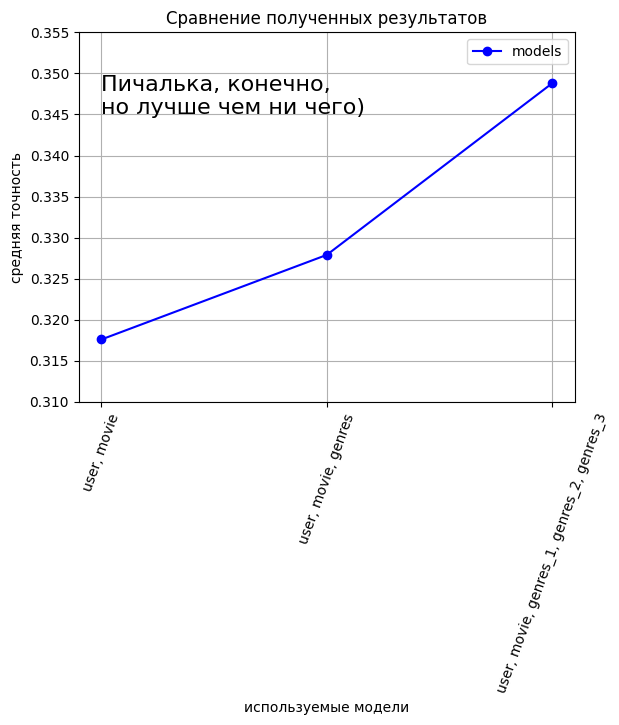

In [97]:
# визуализируем наши скромные результаты
x_report = ['user, movie', 'user, movie, genres', 'user, movie, genres_1, genres_2, genres_3']
y_report = [0.3176, 0.3279, 0.3488]

plt.plot(x_report, y_report, 'bo-', label='models')
plt.xticks(list(range(0, len(x_report), 1)))
plt.xlabel('используемые модели')
plt.xticks(rotation=70)
plt.ylabel('средняя точность')
plt.title('Сравнение полученных результатов')
plt.text(x_report[0], 0.345, 'Пичалька, конечно,\nно лучше чем ни чего)', fontsize=16)
plt.ylim (0.31, 0.355)
plt.legend()
plt.grid(True)

plt.show()